In [290]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import statsmodels.tsa.stattools as ts
from scipy.stats import norm
from scipy.optimize import minimize

In [304]:
#data = pd.read_csv("EcuadorPopulation.csv")
#data = pd.read_csv("japanfm3539.csv")
#data = pd.read_csv("finlandfm3539.csv")
data = pd.read_csv("finland.csv")
#data = pd.read_csv("Ecuadorfm3539.csv")

population = data.loc[0]
birthrate = data.loc[1]
deathrate = data.loc[2]

start_year = 1970
end_year = 2020
years = [str(year) + ' [YR' + str(year) + ']' for year in range(start_year, end_year)]


def extract_data(df):
    df = df[years]  # Extract the specific row and filter columns
    df = df.reset_index()
    df.columns = ['years', 'population']
    df = df["population"].tolist()
    return df

birthrate = extract_data(birthrate)
deathrate = extract_data(deathrate)
population = extract_data(population)

#print(birthrate)
#print(deathrate)
#print(population)
#print(type(birthrate))

In [305]:
def augmented_dickey_fuller(goog):
    # Output the results of the Augmented Dickey-Fuller test for Google
    # with a lag order value of 1
    adf = ts.adfuller(goog, 1)
    print(adf)

augmented_dickey_fuller(deathrate)

(-1.9067749537471237, 0.32888070172103634, 1, 48, {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}, -22.877705596919483)


In [306]:
'''data = pd.read_csv("wv.csv")
print(data)
start_year = 1925
end_year = 2022
years = [str(year) for year in range(start_year, end_year)]

def extract_data(df):
    df_birthrate = df["BirthRate"].tolist()
    df_deathrate = df["DeathRate"].tolist()
    df_population = df["Population"].tolist()
    return df_birthrate, df_deathrate, df_population

birthrate, deathrate, population = extract_data(data)

'''

'data = pd.read_csv("wv.csv")\nprint(data)\nstart_year = 1925\nend_year = 2022\nyears = [str(year) for year in range(start_year, end_year)]\n\ndef extract_data(df):\n    df_birthrate = df["BirthRate"].tolist()\n    df_deathrate = df["DeathRate"].tolist()\n    df_population = df["Population"].tolist()\n    return df_birthrate, df_deathrate, df_population\n\nbirthrate, deathrate, population = extract_data(data)\n\n'

In [307]:
def get_mean_birth_rate(df):
    sum = 0
    for i in range(len(df)):
        sum += df[i]
    sum = sum/len(df)
    return sum

mean = get_mean_birth_rate(birthrate)
print(mean)

def get_mean_death_rate(df):
    sum = 0
    for i in range(len(df)):
        sum += df[i]
    sum = sum/len(df)
    return sum

mean_birth_rate = get_mean_birth_rate(birthrate)
print("Mean Birth Rate from " + str(start_year) + " to " + str(end_year) + ": " + str(round(mean_birth_rate, 5)))

mean_death_rate = get_mean_death_rate(deathrate)
print("Mean Death Rate from " + str(start_year) + " to " + str(end_year) + ": " + str(round(mean_death_rate, 5)))

11.948000000000004
Mean Birth Rate from 1970 to 2020: 11.948
Mean Death Rate from 1970 to 2020: 9.518


In [309]:
def OU(x1, x2, dt, theta, mu, sigma):
    sigma0 = sigma**2 * (1 - np.exp(-2*mu*dt)) / (2 * mu)
    sigma0 = np.sqrt( sigma0 )
    
    prefactor = 1 / np.sqrt(2 * np.pi * sigma0**2)
    
    f =  prefactor * np.exp( -(x2 - x1 * np.exp(-mu*dt) - \
                    theta * (1-np.exp(-mu*dt)) )**2 / (2 * sigma0**2) )
    
    return f

#  Calculate the negative of the log likelihood
def log_likelihood_OU(p, X, dt):
    
    theta = p[0]
    mu = p[1]
    sigma = p[2]
    
    N = len(X)
    
    f = np.zeros( (N-1, ) )
    
    for i in range( 1, N ):
        x2 = X[i]
        x1 = X[i-1]
        
        f[i-1] = OU(x1, x2, dt, theta, mu, sigma)
    
    ind = np.where(f == 0)
    ind = ind[0]
    if ind.size > 0:
        f[ind] = 10**-8
        
    f = np.log(f)
    f = np.sum(f)
        
    return -f

#  mu and sigma must be greater than zero.  We use these contraint functions with minimze
def constraint1( p ):
    return p[1]

def constraint2( p ):
    return p[2]


#  Add constraint function to a dictionary
cons = ( {'type':'ineq', 'fun': constraint1},
         {'type':'ineq', 'fun': constraint2} )

#  Initial guess for our parameters
p0 = [1, 1, 1]

#  Call minimize
minimize(log_likelihood_OU, p0, args = (deathrate, 1/len(birthrate)), constraints=cons)

C:\Users\JKelly\AppData\Local\Temp\ipykernel_39460\3947847487.py:2: RuntimeWarning: overflow encountered in exp
  sigma0 = sigma**2 * (1 - np.exp(-2*mu*dt)) / (2 * mu)
C:\Users\JKelly\AppData\Local\Temp\ipykernel_39460\3947847487.py:7: RuntimeWarning: overflow encountered in exp
  f =  prefactor * np.exp( -(x2 - x1 * np.exp(-mu*dt) - \
C:\Users\JKelly\AppData\Local\Temp\ipykernel_39460\3947847487.py:8: RuntimeWarning: overflow encountered in exp
  theta * (1-np.exp(-mu*dt)) )**2 / (2 * sigma0**2) )
C:\Users\JKelly\AppData\Local\Temp\ipykernel_39460\3947847487.py:7: RuntimeWarning: invalid value encountered in scalar subtract
  f =  prefactor * np.exp( -(x2 - x1 * np.exp(-mu*dt) - \


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 902.6133564536661
       x: [ 2.196e+00  1.965e+04  2.083e+00]
     nit: 8
     jac: [ 0.000e+00  0.000e+00  0.000e+00]
    nfev: 54
    njev: 7

54
(54,)
[14.  13.2 12.7 12.2 13.3 13.9 14.1 13.9 13.5 13.3 13.2 13.2 13.7 13.8
 13.3 12.8 12.3 12.1 12.8 12.8 13.1 13.  13.2 12.8 12.8 12.3 11.8 11.5
 11.1 11.1 11.  10.8 10.7 10.9 11.  11.  11.2 11.1 11.2 11.3 11.4 11.1
 11.  10.7 10.5 10.1  9.6  9.1  8.6  8.3  8.4  9.   8.1  8.3]


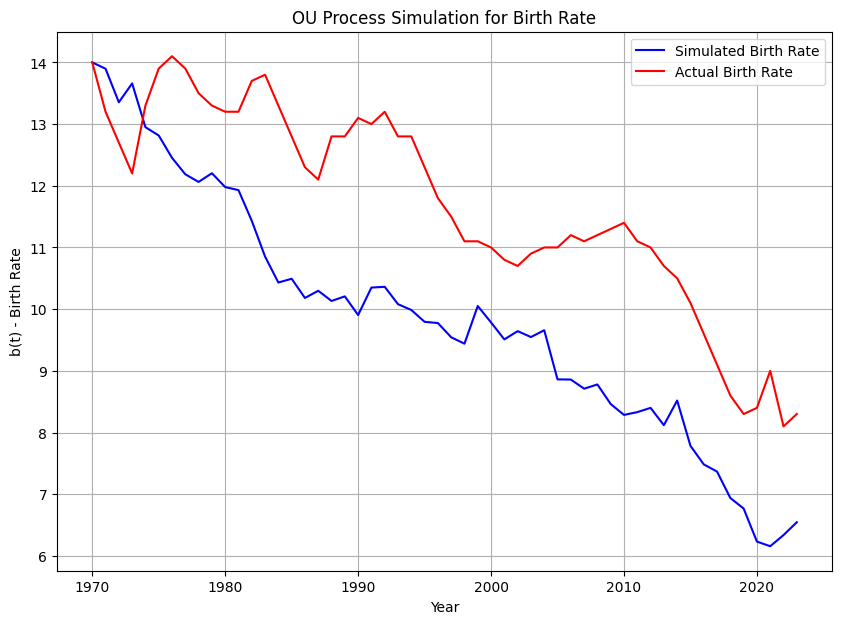

In [296]:
def plot_results_birthrate(gamma_b):
    
    #gamma_b = 0.7
    #b_e = mean_birth_rate
    
    b_e = 7.926
    sigma = 2.246

    X_0 = birthrate[0]
    T = len(birthrate)
    dt = 1/T
    #N = int(T/dt)
    N = len(birthrate)
    print(N)
    X = np.zeros(N)
    X[0] = X_0


    X_actual = birthrate
    X_actual = np.array(X_actual)

    print(X_actual.shape)

    x_vals = list(range(len(years)))
    year_labels = [start_year + i for i in x_vals]

    print(X_actual)
    for t in range(1,N):
        dW = np.sqrt(dt) * np.random.normal(0,1)
        X[t] = X[t-1] + gamma_b * (b_e - X[t-1]) * dt + sigma * dW
        
    plt.figure(figsize=(10,7))
    plt.plot(year_labels, X, color="b", label = "Simulated Birth Rate")
    plt.plot(year_labels, X_actual, color="r", label = "Actual Birth Rate")
    plt.title("OU Process Simulation for Birth Rate")
    plt.legend()
    plt.grid(True)
    plt.xlabel("Year")
    plt.ylabel("b(t) - Birth Rate")
    plt.show()
    
plot_results_birthrate(3.2)

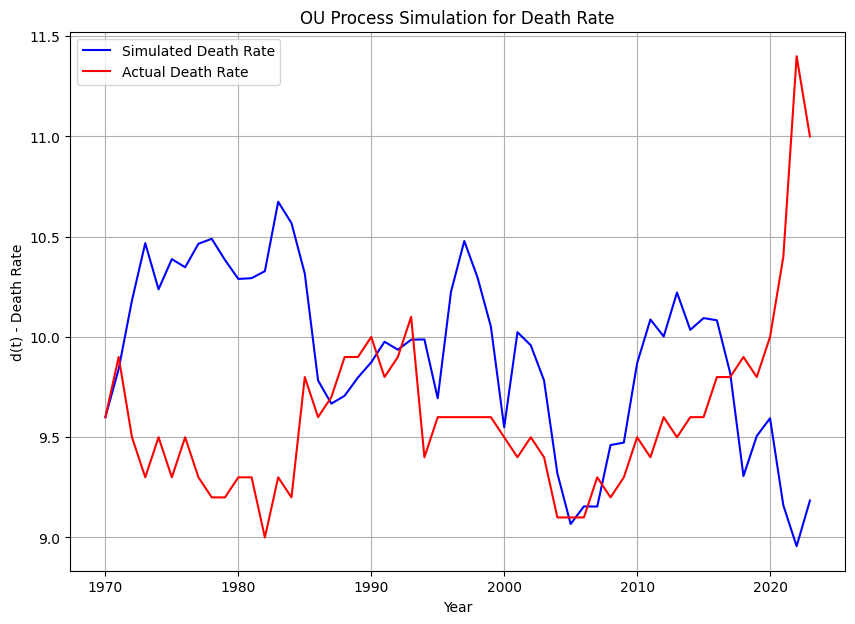

In [297]:
def plot_results_deathrate(gamma_d,sigma_d):
    
    #gamma_d = 0.7
    #sigma_d = 2
    #d_e = mean_death_rate
    d_e = 10.26
    gamma_d = 3.2
    sigma_d = 1.746
    
    X_0 = deathrate[0]
    T = len(deathrate)
    dt = 1/T
    N = len(deathrate)
    X = np.zeros(N)
    X[0] = X_0

    X_actual = deathrate
    X_actual = np.array(X_actual)

    x_vals = list(range(len(years)))
    year_labels = [start_year + i for i in x_vals]

    for t in range(1,N):
        dW = np.sqrt(dt) * np.random.normal(0,1)
        X[t] = X[t-1] + gamma_d * (d_e - X[t-1]) * dt + sigma_d * dW
    
    plt.figure(figsize=(10,7))
    plt.plot(year_labels, X, color="b", label = "Simulated Death Rate")
    plt.plot(year_labels, X_actual, color="r", label = "Actual Death Rate")
    plt.title("OU Process Simulation for Death Rate")
    plt.legend()
    plt.grid(True)
    plt.xlabel("Year")
    plt.ylabel("d(t) - Death Rate")
    plt.show()
    
    
    return X, X_actual, year_labels

X, X_actual, year_labels = plot_results_deathrate(3.2, 1.746)


def plot_results_birthrate(gamma_b,sigma_b):
    
    #gamma_b = 0.7
    #sigma_b = 2
    b_e = mean_birth_rate
    X_0 = birthrate[0]
    T = len(birthrate)
    dt = 1/T
    N = len(birthrate)
    X = np.zeros(N)
    X[0] = X_0

    X_actual = birthrate
    X_actual = np.array(X_actual)

    x_vals = list(range(len(years)))
    year_labels = [start_year + i for i in x_vals]

    for t in range(1,N):
        dW = np.sqrt(dt) * np.random.normal(0,1)
        X[t] = X[t-1] + gamma_b * (b_e - X[t-1]) * dt + sigma_b * dW
    
    
    return X, X_actual, year_labels

X, X_actual, year_labels = plot_results_birthrate(2, 2)

In [298]:
def sim_d(gamma_d, sigma_d):
    simulations = 100

    for i in range(simulations):
        X, X_actual, year_labels = plot_results_deathrate(gamma_d, sigma_d)
        plt.plot(year_labels, X, alpha=0.25)
        plt.plot(year_labels, X_actual, color="g")

    plt.title("Simulation for Death Rate")
    plt.legend()
    plt.grid(True)
    plt.xlabel("Year")
    plt.ylabel("D(t) - Death Rate")
    plt.show()

In [299]:
# Define your sliders
gamma_d_slider = widgets.FloatSlider(min=-10, max=10, step=0.1, value=1, description="Rate of Reversion")
sigma_d_slider = widgets.FloatSlider(min=0.01, max=5, step=0.01, value=1, description="Volatility")

# Create a grid layout for the sliders (2x3 layout)
grid_layout = widgets.GridBox(
    children=[gamma_d_slider, sigma_d_slider],
    layout=Layout(grid_template_columns="repeat(2, 300px)", grid_template_rows="repeat(1, auto)", grid_gap="10px")
)



# Display the interactive widgets and buttons in a grid layout
ui = widgets.VBox([grid_layout])
out = widgets.interactive_output(sim_d, {
    'gamma_d': gamma_d_slider, 
    'sigma_d': sigma_d_slider
})

display(ui, out)

Output()

In [300]:
def sim_b(gamma_b, sigma_b):
    simulations = 100

    for i in range(simulations):
        X, X_actual, year_labels = plot_results_birthrate(gamma_b, sigma_b)
        plt.plot(year_labels, X, alpha=0.25)
        plt.plot(year_labels, X_actual, color="g")

    plt.title("Simulation for Birth Rate")
    plt.legend()
    plt.grid(True)
    plt.xlabel("Year")
    plt.ylabel("B(t) - Birth Rate")
    plt.show()
    

# Define your sliders
gamma_b_slider = widgets.FloatSlider(min=-10, max=10, step=0.1, value=1, description="Rate of Reversion")
sigma_b_slider = widgets.FloatSlider(min=0.01, max=5, step=0.01, value=1, description="Volatility")

# Create a grid layout for the sliders (2x3 layout)
grid_layout = widgets.GridBox(
    children=[gamma_b_slider, sigma_b_slider],
    layout=Layout(grid_template_columns="repeat(2, 300px)", grid_template_rows="repeat(1, auto)", grid_gap="10px")
)



# Display the interactive widgets and buttons in a grid layout
ui = widgets.VBox([grid_layout])
out = widgets.interactive_output(sim_b, {
    'gamma_b': gamma_b_slider, 
    'sigma_b': sigma_b_slider
})

display(ui, out)

Output()

In [301]:
def get_population_model():
    
    #gamma_b = 7.9
    #sigma_b = 2.25
    #
    #gamma_d = 6.2
    #sigma_d = 1.4
    #d_e = mean_death_rate/10
    #b_e = mean_birth_rate/10 
    
    b_e = 7.926
    sigma_b = 2.246
    gamma_b = 3.2
    
    d_e = 10.26
    gamma_d = 3.2
    sigma_d = 1.746

    B_0 = birthrate[0]
    D_0 = deathrate[0]
    Y_0 = population[0]
    T = len(deathrate)
    dt = 1/T
    #N = int(T/dt)
    N = len(deathrate)
    
    Y = np.zeros(N)
    Y[0] = Y_0
    
    B = np.zeros(N)
    B[0] = B_0
    
    D = np.zeros(N)
    D[0] = D_0
    
    Y_actual = population
    Y_actual = np.array(Y_actual)

    x_vals = list(range(len(years)))
    year_labels = [1960 + i for i in x_vals]

    for t in range(1,N):
        dW1 = np.sqrt(dt) * np.random.normal(0,1) # Population Weiner Process
        dW2 = np.sqrt(dt) * np.random.normal(0,1) # Birth Rate Weiner Process
        dW3 = np.sqrt(dt) * np.random.normal(0,1) # Death Rate Weiner Process
        
        
        #B[t] = max(B[t-1] + gamma_b * (b_e - B[t-1]) * dt + sigma_b * dW2,0)
        #D[t] = max(D[t-1] + gamma_d * (d_e - D[t-1]) * dt + sigma_d * dW3,0)
        B[t] = max(B[t-1] + gamma_b * (b_e - B[t-1]) * dt + sigma_b * dW2,0)
        D[t] = max(D[t-1] + gamma_d * (d_e - D[t-1]) * dt + sigma_d * dW3,0)
        
        Y[t] = Y[t-1] + (B[t-1] - D[t-1]) * Y[t-1] * (dt) + np.sqrt(Y[t-1]*(B[t-1] + D[t-1])) * dW1
        
    return Y
    
Y = get_population_model()

C:\Users\JKelly\AppData\Local\Temp\ipykernel_39460\2458461662.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


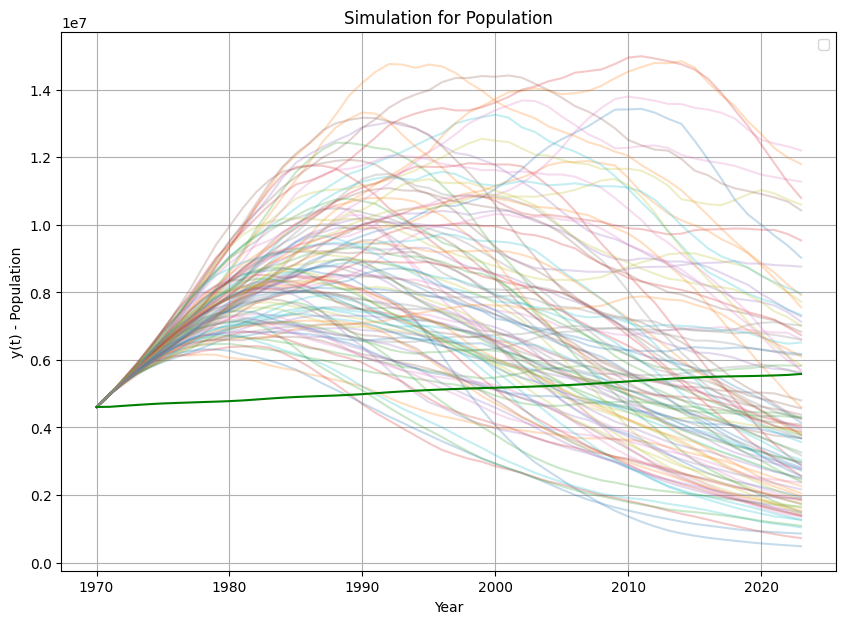

[4606307.0, 4981619.642925972, 5352909.633553895, 5715614.526126575, 6062762.045424483, 6400537.761682377, 6720695.214945781, 7023669.54298213, 7309744.361018599, 7566041.476392542, 7795841.422898647, 8013834.361634445, 8207278.966856, 8367047.633204222, 8492706.34229745, 8596911.246015213, 8669800.582923196, 8723431.943574222, 8750458.91141865, 8749941.067661228, 8735512.02504317, 8695752.358168697, 8633162.33055999, 8546825.615690118, 8456064.982406888, 8355763.04509612, 8249591.462692207, 8134714.514194632, 8007145.930966236, 7876457.225742437, 7738291.5924357865, 7600583.988336466, 7451528.36555332, 7295533.343628701, 7141911.654737426, 6982429.185603136, 6829710.545484388, 6675873.426318568, 6529889.045791093, 6388820.942447981, 6240317.231350627, 6087961.382861398, 5931701.991387302, 5775795.709481371, 5627257.117247054, 5477149.148227598, 5320632.331444066, 5166383.114740342, 5014358.571629447, 4864856.5910651935, 4716519.3950412, 4572743.550589879, 4431197.144669587, 4290174.40

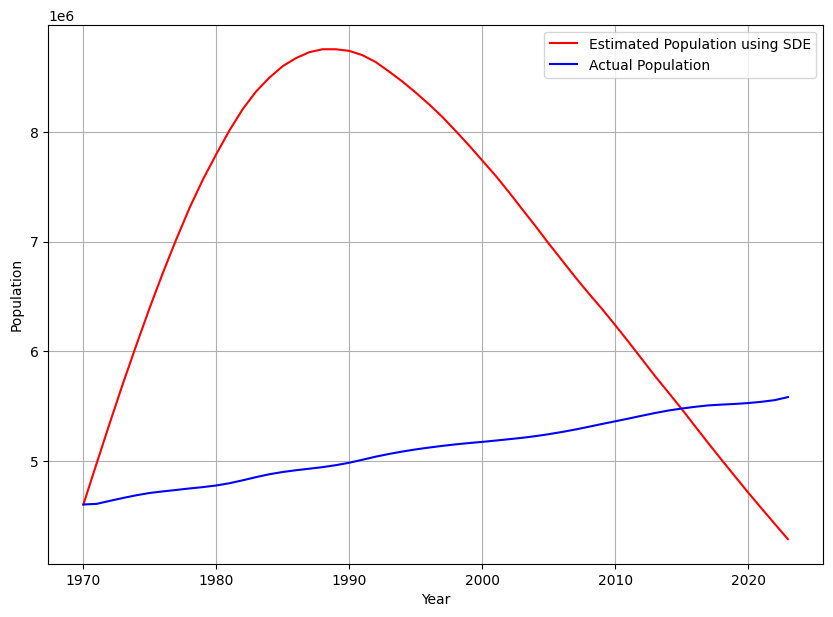

In [302]:
def main():

    simulations = 100
    plt.figure(figsize=(10,7))
    Y_actual = population
    Y_actual = np.array(Y_actual)

    x_vals = list(range(len(years)))
    year_labels = [start_year + i for i in x_vals]
    Y_vault = []
    for i in range(simulations):
        Y = get_population_model()
        Y_vault.append(Y)
        plt.plot(year_labels, Y, alpha=0.25)
    plt.plot(year_labels, Y_actual, color="g")

    plt.title("Simulation for Population")
    plt.legend()
    plt.grid(True)
    plt.xlabel("Year")
    plt.ylabel("y(t) - Population")
    plt.show()

    return Y_vault

Y_vault = main()

mean_pop_per_year = []
for i in range(len(Y_vault[0])):
    
    year_slice = []
    
    for j in range(len(Y_vault)):
        year_slice.append(Y_vault[j][i])
        
    mean_pop_per_year.append(np.mean(year_slice))
    
print(mean_pop_per_year)

plt.figure(figsize=(10,7))
plt.plot(year_labels, mean_pop_per_year, color='r', label="Estimated Population using SDE")
plt.plot(year_labels, population, color="b", label="Actual Population")
plt.legend()
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()
